In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import networkx as nx

# Экспоненциальное распределение
def generate_exponential_samples(n, lambda_param):
    samples = np.random.exponential(1/lambda_param, n)
    return samples

# Гамма распределение
def generate_gamma_samples(n, lambda_param):
    alpha = 1 / 2
    samples = np.random.gamma(alpha, 1 / lambda_param, n)
    return samples

#Генерация Normal(0,σ);
def generate_normal_samles(size, loc=0, scale=1):
    return np.random.normal(loc, scale, size)

#Генерация Student-t(ν)
def generate_standard_t_samles(size, df=3):
    return np.random.standard_t(df, size)

# Построение knn-графа
def generate_knn_graph(sample, k):
    sample = np.array(sample).reshape(-1, 1)

    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(sample)

    distances, indices = knn.kneighbors(sample)

    G = nx.Graph()

    for i in range(len(sample)):
        G.add_node(i, pos=(sample[i][0], 0))
        for j in range(1, k):
            G.add_edge(i, indices[i][j])
    '''
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    plt.title(f'KNN Graph (k={k})')
    plt.xlabel('Sample Values')
    plt.yticks([])
    plt.show()
    '''
    return G

# Построение дистанционного графа
def generate_distance_graph(sample, d):
    G = nx.Graph()

    for i in range(len(sample)):
        G.add_node(i, pos=(sample[i], 0))

    for i in range(len(sample)):
        for j in range(i + 1, len(sample)):
            if abs(sample[i] - sample[j]) <= d:
                G.add_edge(i, j)
    '''
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    plt.title(f'Distance Graph with d = {d}')
    plt.xlabel('Sample Values')
    plt.yticks([])
    plt.show()
    '''
    return G

# макс степень вершины
def max_node_degree(graph):
    if not graph:
        return 0

    degrees = dict(graph.degree())
    max_degree = max(degrees.values())
    return max_degree

# макс. независимое множество
def max_independent_set_size(graph):
    if not graph:
        return 0
    independent_set = nx.algorithms.approximation.maximum_independent_set(graph)
    return len(independent_set)

#δ(G) - минимальная степень
def min_node_degree(graph):
    if not graph:
        return 0

    degrees = dict(graph.degree())
    return min(degrees.values())

#χ(G) - Хроматическое число
def chromatic_number(graph):
    if not graph:
        return 0
    coloring = nx.algorithms.coloring.greedy_color(graph, strategy='largest_first', interchange=True)
    return max(coloring.values()) + 1

Эксперементы с графом knn и нормальным распределением.

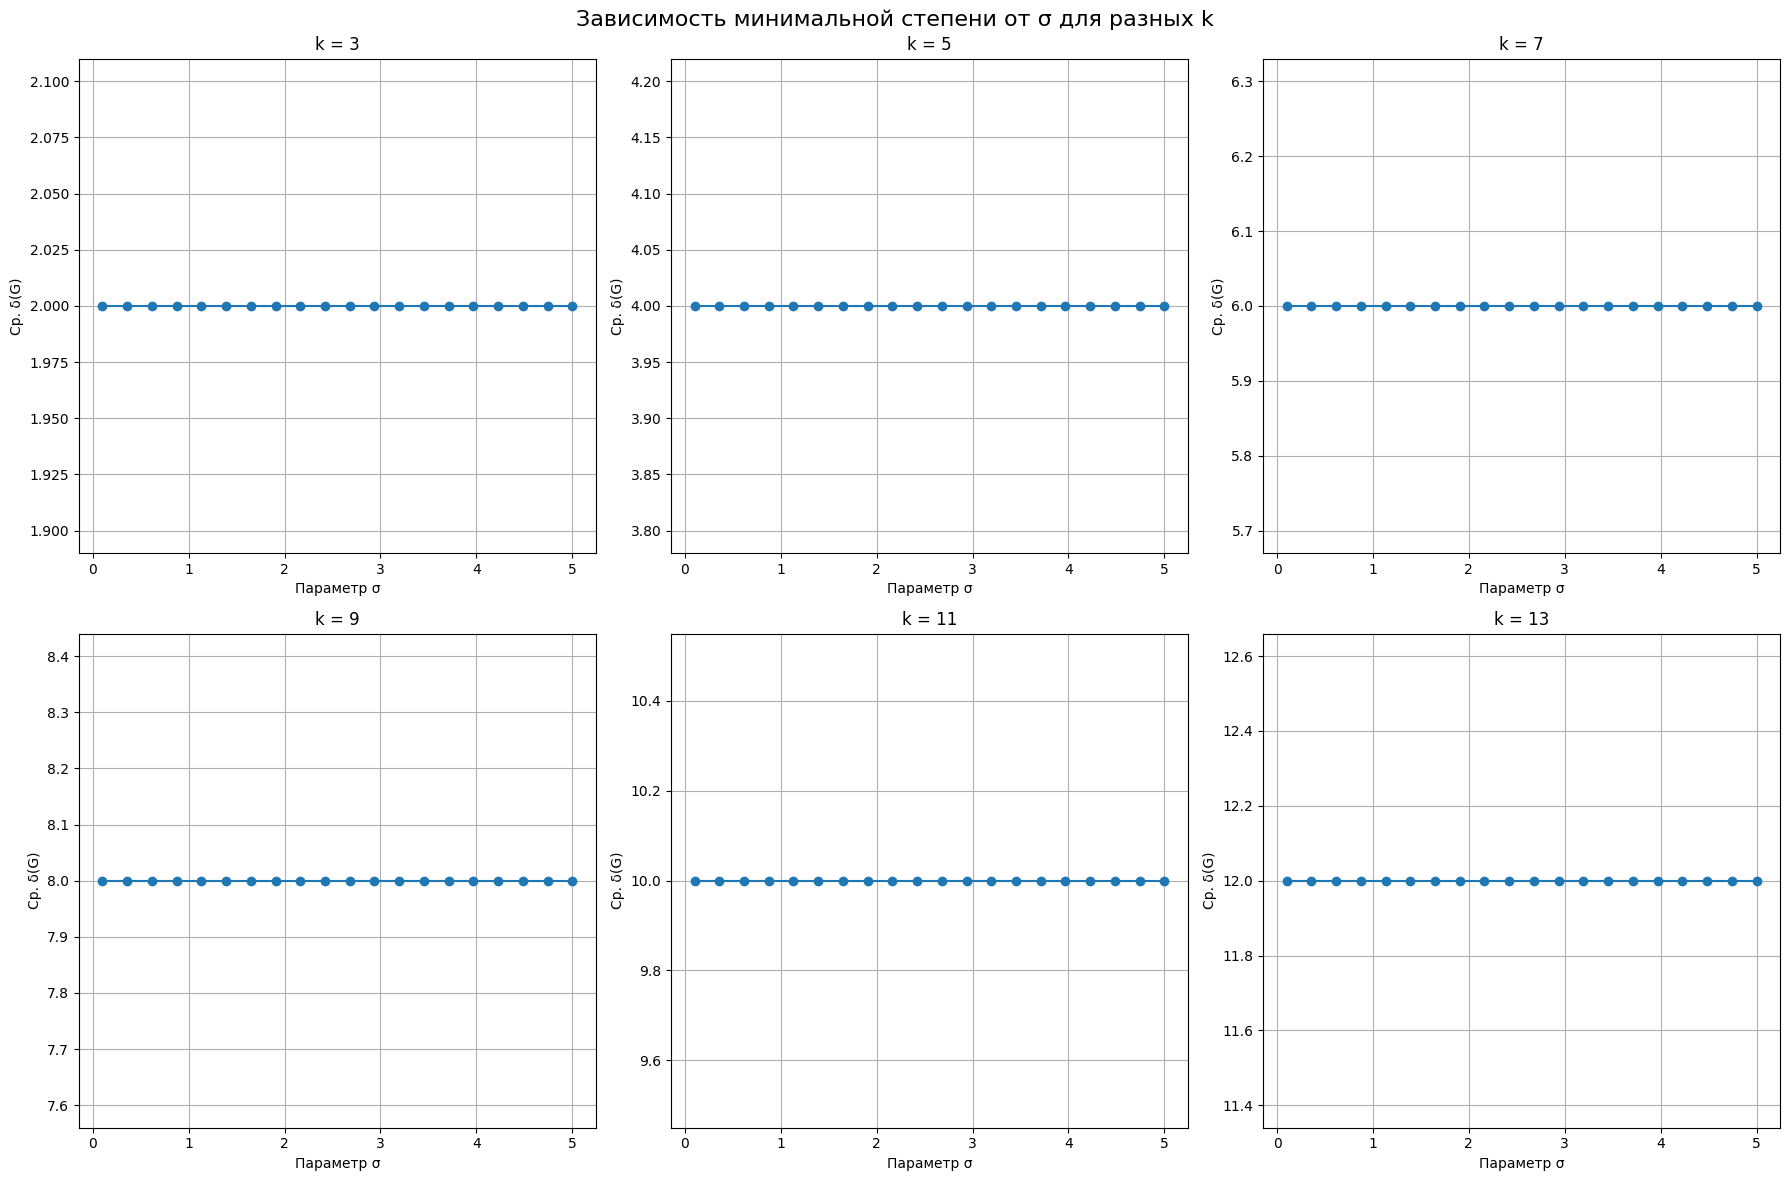

In [ ]:
param_grid = {
    'k_neighbors': [3, 5, 7, 9, 11, 13],
    'scale': np.linspace(0.1, 5.0, 20)
}
n = 1000
n_trials = 100
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Зависимость минимальной степени от σ для разных k', fontsize=16)
for i, k in enumerate(param_grid['k_neighbors']):
    min_degrees_means = []
    for scale in param_grid['scale']:
        min_degrees = []
        for _ in range(n_trials):
            samples = generate_normal_samles(n,scale=scale)
            G = generate_knn_graph(samples, k)
            min_degree = min_node_degree(G)
            min_degrees.append(min_degree)
        min_degrees_means.append(np.mean(min_degrees))
    ax = axes[i//3, i%3]
    ax.plot(param_grid['scale'], min_degrees_means, marker='o')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Параметр σ')
    ax.set_ylabel('Ср. δ(G)')
    ax.grid(True)
plt.tight_layout()
plt.show()






Эксперементы с графом knn и Student-t(ν).

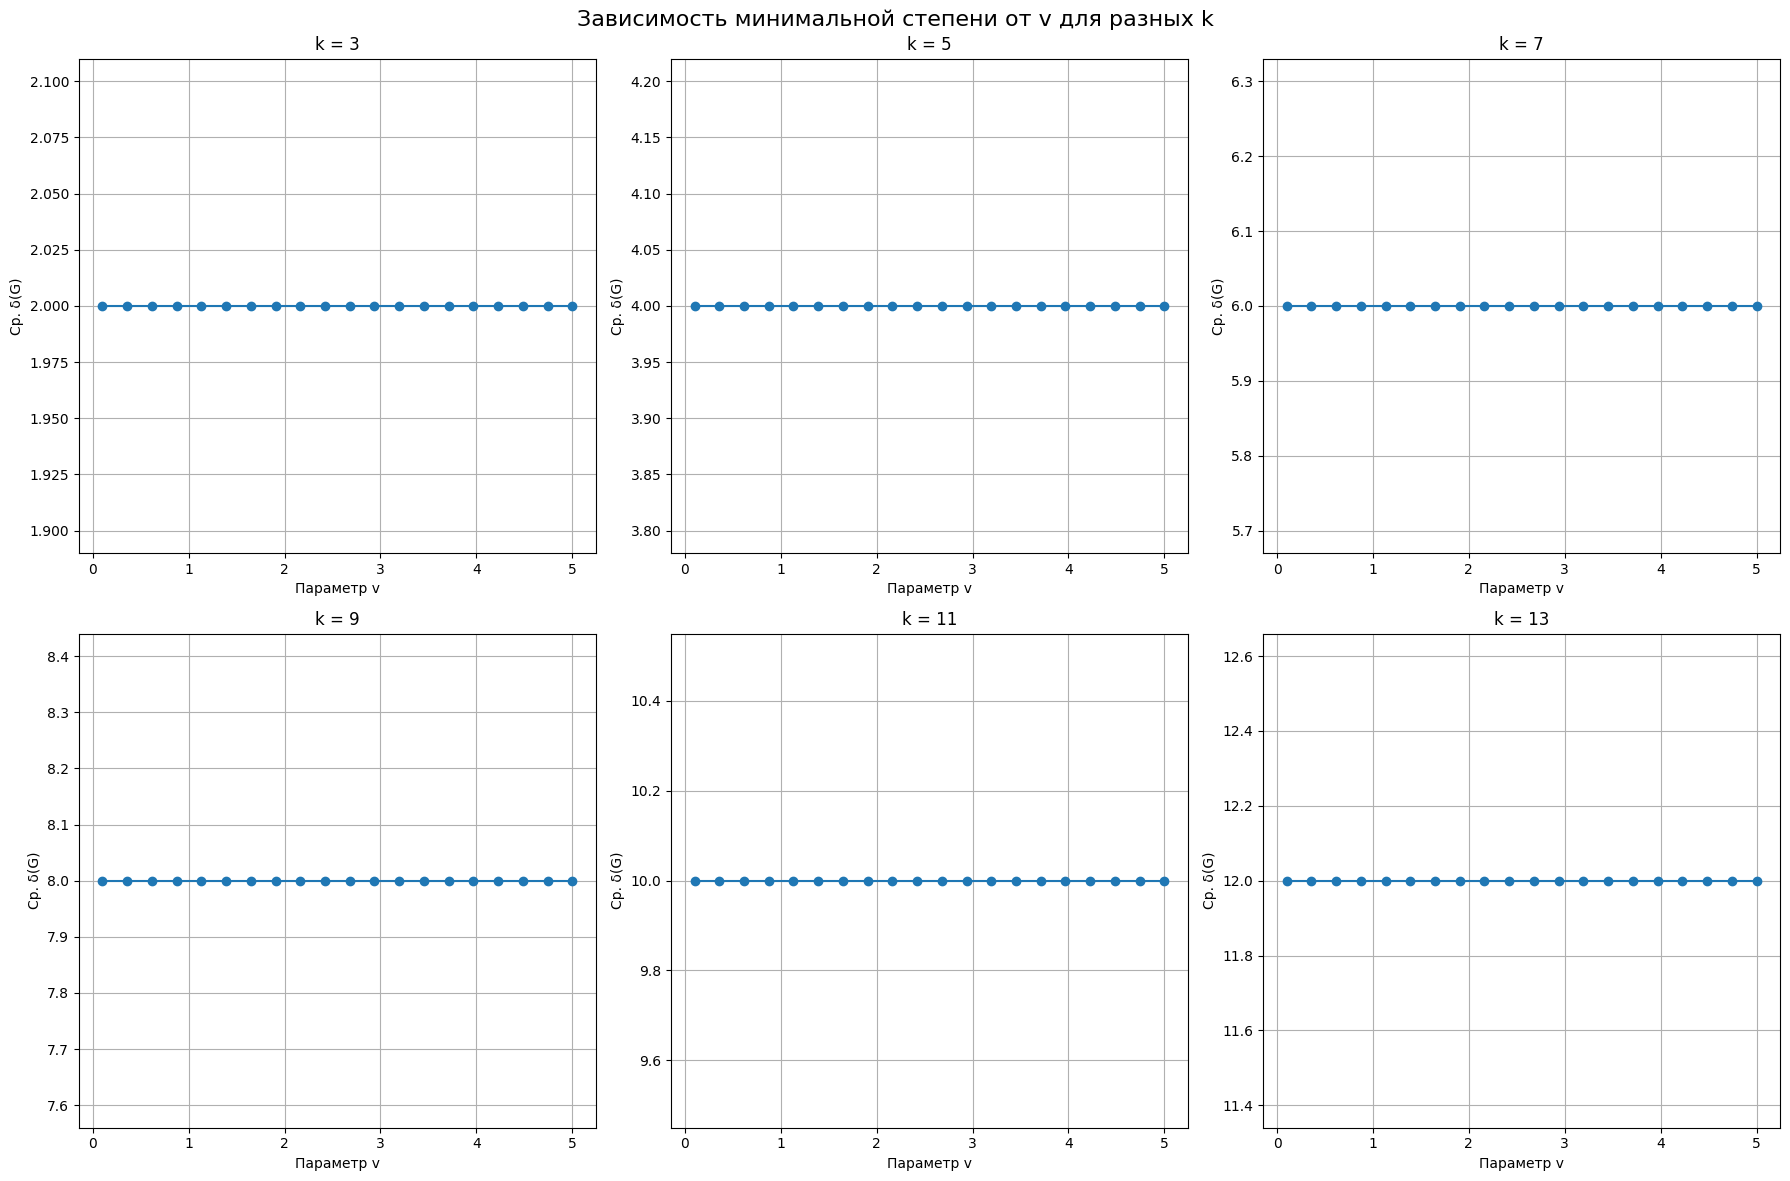

In [ ]:
param_grid = {
    'k_neighbors': [3, 5, 7, 9, 11, 13],
    'df': np.linspace(0.1, 5.0, 20)
}
n = 1000
n_trials = 100
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Зависимость минимальной степени от v для разных k', fontsize=16)
for i, k in enumerate(param_grid['k_neighbors']):
    min_degrees_means = []
    for v in param_grid['df']:
        min_degrees = []
        for _ in range(n_trials):
            samples = generate_standard_t_samles(n,df=v)
            G = generate_knn_graph(samples, k)
            min_degree = min_node_degree(G)
            min_degrees.append(min_degree)
        min_degrees_means.append(np.mean(min_degrees))
    ax = axes[i//3, i%3]
    ax.plot(param_grid['df'], min_degrees_means, marker='o')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Параметр v')
    ax.set_ylabel('Ср. δ(G)')
    ax.grid(True)
plt.tight_layout()
plt.show()

Можно заметить, что характеристика δ(G) не зависит от распределения, графики идентичны.

Эксперементы с графом dist и нормальным распределением.

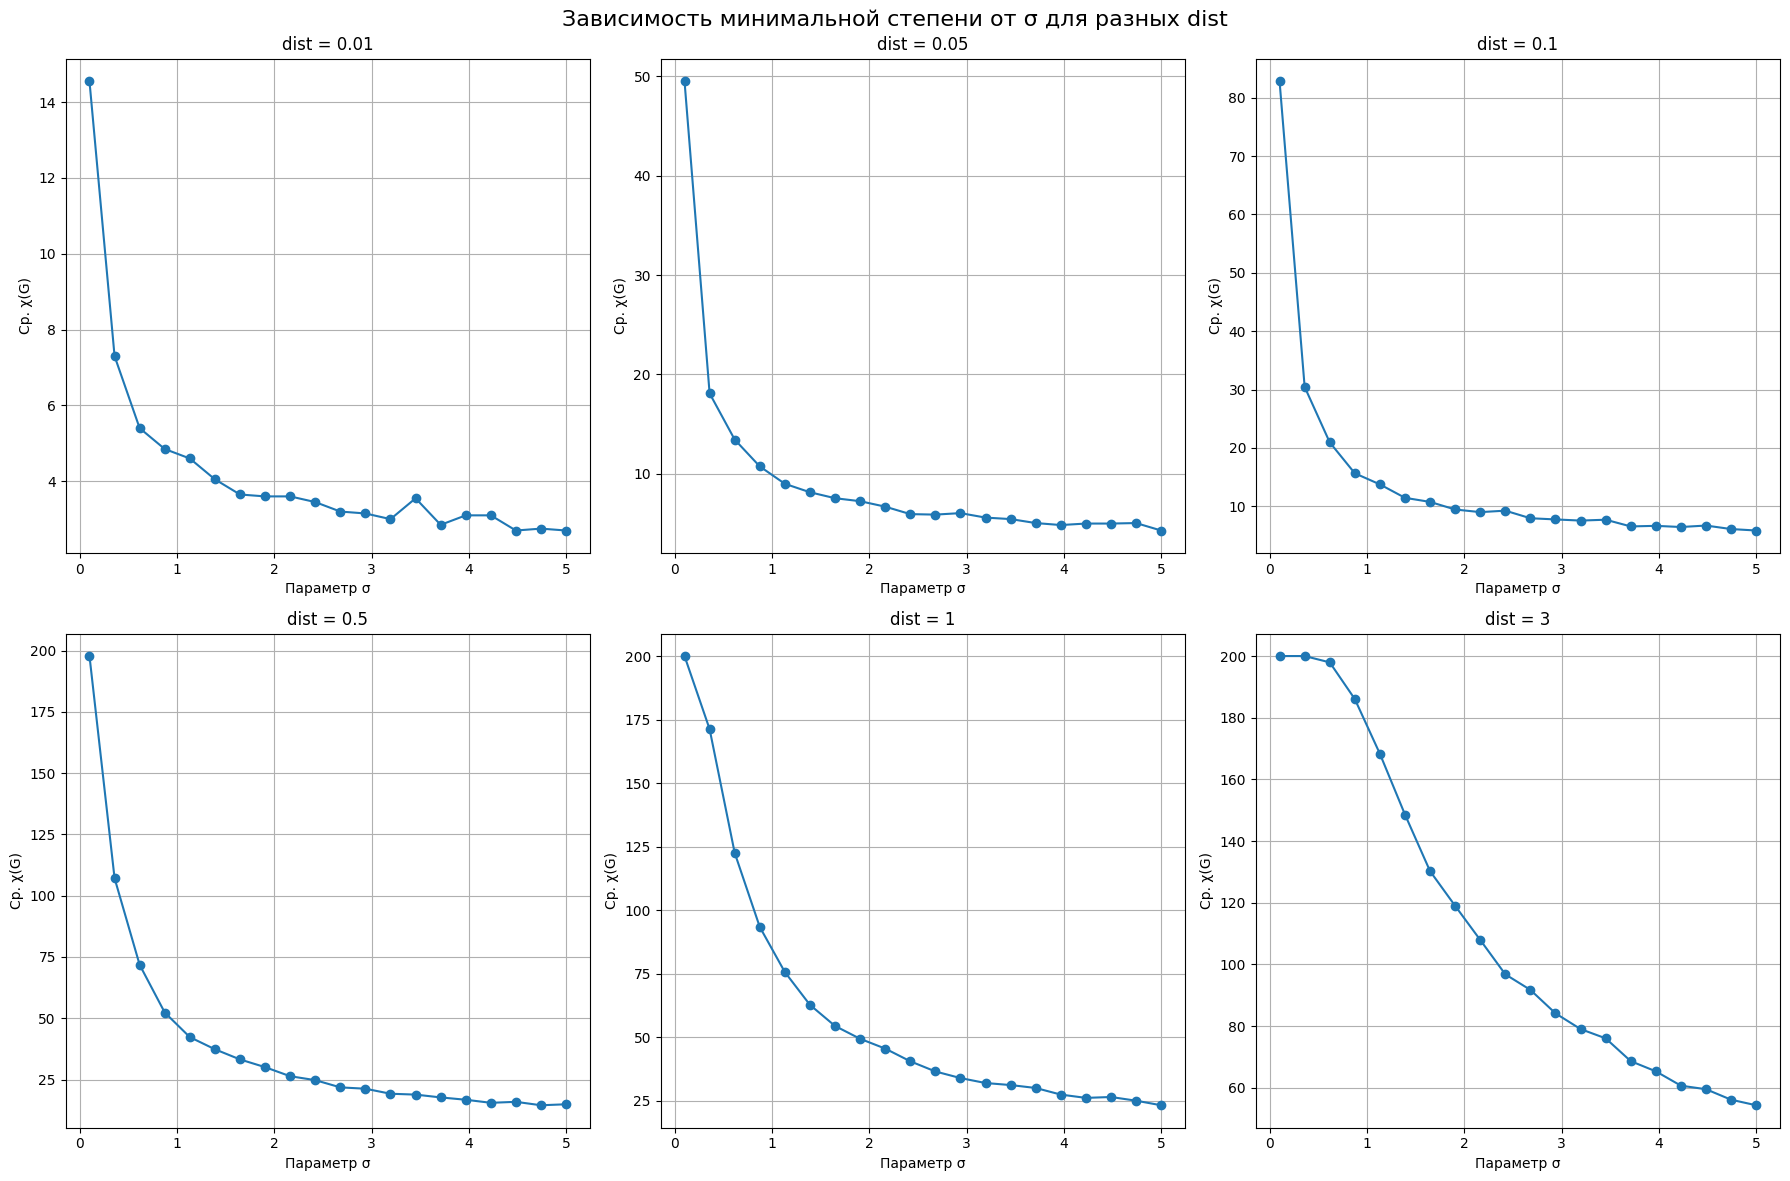

In [ ]:
param_grid = {
    'dist': [0.01, 0.05, 0.1, 0.5, 1, 3],
    'scale': np.linspace(0.1, 5.0, 20)
}
n = 200
n_trials = 20
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Зависимость минимальной степени от σ для разных dist', fontsize=16)
for i, d in enumerate(param_grid['dist']):
    chromatic_means = []
    for scale in param_grid['scale']:
        chromatics = []
        for _ in range(n_trials):
            samples = generate_normal_samles(n,scale=scale)
            G = generate_distance_graph(samples, d = d)
            chromatic = chromatic_number(G)
            chromatics.append(chromatic)
        chromatic_means.append(np.mean(chromatics))
    ax = axes[i//3, i%3]
    ax.plot(param_grid['scale'], chromatic_means, marker='o')
    ax.set_title(f'dist = {d}')
    ax.set_xlabel('Параметр σ')
    ax.set_ylabel('Ср. χ(G)')
    ax.grid(True)
plt.tight_layout()
plt.show()


Эксперементы с графом dist и Student-t(ν).

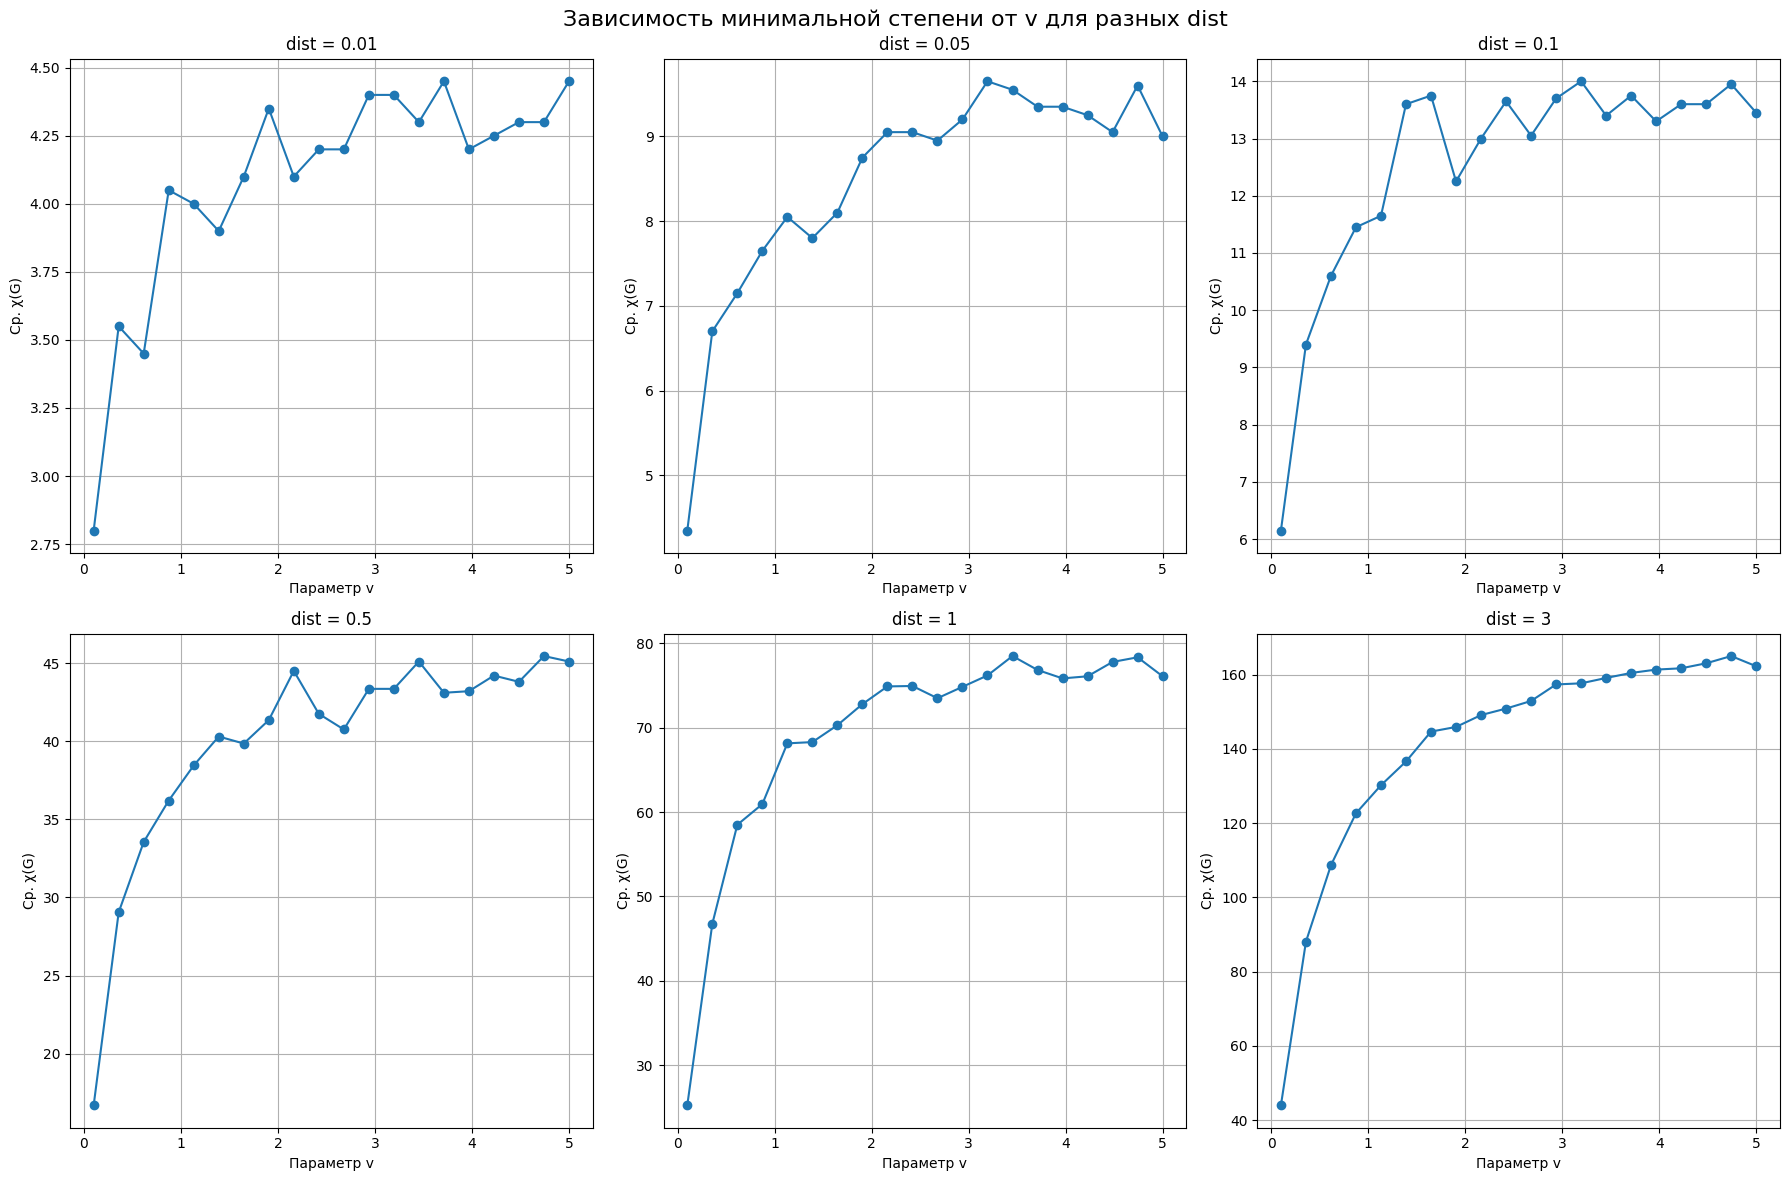

In [32]:
param_grid = {
    'dist': [0.01, 0.05, 0.1, 0.5, 1, 3],
    'v': np.linspace(0.1, 5.0, 20)
}
n = 200
n_trials = 20
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Зависимость минимальной степени от v для разных dist', fontsize=16)
for i, d in enumerate(param_grid['dist']):
    chromatic_means = []
    for v in param_grid['v']:
        chromatics = []
        for _ in range(n_trials):
            samples = generate_standard_t_samles(n,df=v)
            G = generate_distance_graph(samples, d = d)
            chromatic = chromatic_number(G)
            chromatics.append(chromatic)
        chromatic_means.append(np.mean(chromatics))
    ax = axes[i//3, i%3]
    ax.plot(param_grid['v'], chromatic_means, marker='o')
    ax.set_title(f'dist = {d}')
    ax.set_xlabel('Параметр v')
    ax.set_ylabel('Ср. χ(G)')
    ax.grid(True)
plt.tight_layout()
plt.show()


Графики для дистанционного графа и хроматического числа сильно отличаются, мы можем проследить закономерность: с ростом σ характеристика χ(G) для нормального распределения уменьшается, а с ростом v характеристика χ(G) для Student-t(ν) наоборот растет.